In [605]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import cv2  
from torchvision import transforms



In [606]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:")
print(tf.config.list_physical_devices())

TensorFlow version: 2.16.2
Available devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


(546, 28, 28)
(156, 28, 28)
(78, 28, 28)
(780, 28, 28)


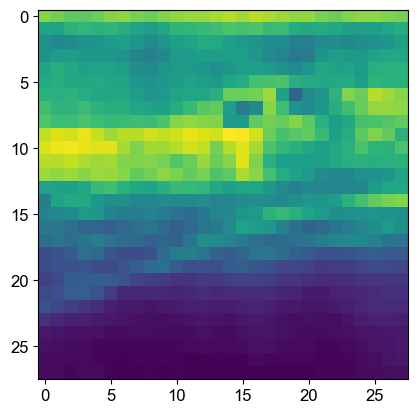

In [609]:
import medmnist
from medmnist import INFO, Evaluator

data_flag = 'breastmnist'
download = True
info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])
DataClass = getattr(medmnist, info['python_class'])
t = transforms.ToTensor()

# load the data
train_label = np.array(DataClass(split='train', transform=t, download=download).labels)
test_label = np.array(DataClass(split='test', transform=t, download=download).labels)
val_label = np.array(DataClass(split='val', transform=t, download=download).labels)
labels = np.concatenate((train_label,test_label,val_label))
#labels = np.load("/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/cifar10/cifar10_labels.npy", allow_pickle=True)
train_dataset = np.array(DataClass(split='train', transform=t, download=download).imgs)
test_dataset = np.array(DataClass(split='test', transform=t, download=download).imgs)
val_dataset = np.array(DataClass(split='val', transform=t, download=download).imgs)
print(train_dataset.shape)
print(test_dataset.shape)
print(val_dataset.shape)
df = np.concatenate((train_dataset,test_dataset,val_dataset))
#df = np.load("/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/cifar10/cifar10_images_gray.npy", allow_pickle=True)
print(df.shape)
plt.imshow(df[299])




In [610]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

sample_size = len(df)
X_valtrain, X_valtest, y_train, y_test = train_test_split(df.reshape(sample_size,784), labels.ravel(), test_size=0.2, random_state=42)
classifier = RidgeClassifier()
cls = RidgeClassifier()
cls.fit(X_valtrain, y_train)
y_pred = cls.predict(X_valtest)
base_acc = cls.score(X_valtest, y_test)

results_ridge = base_acc

In [611]:
base_acc

0.6858974358974359

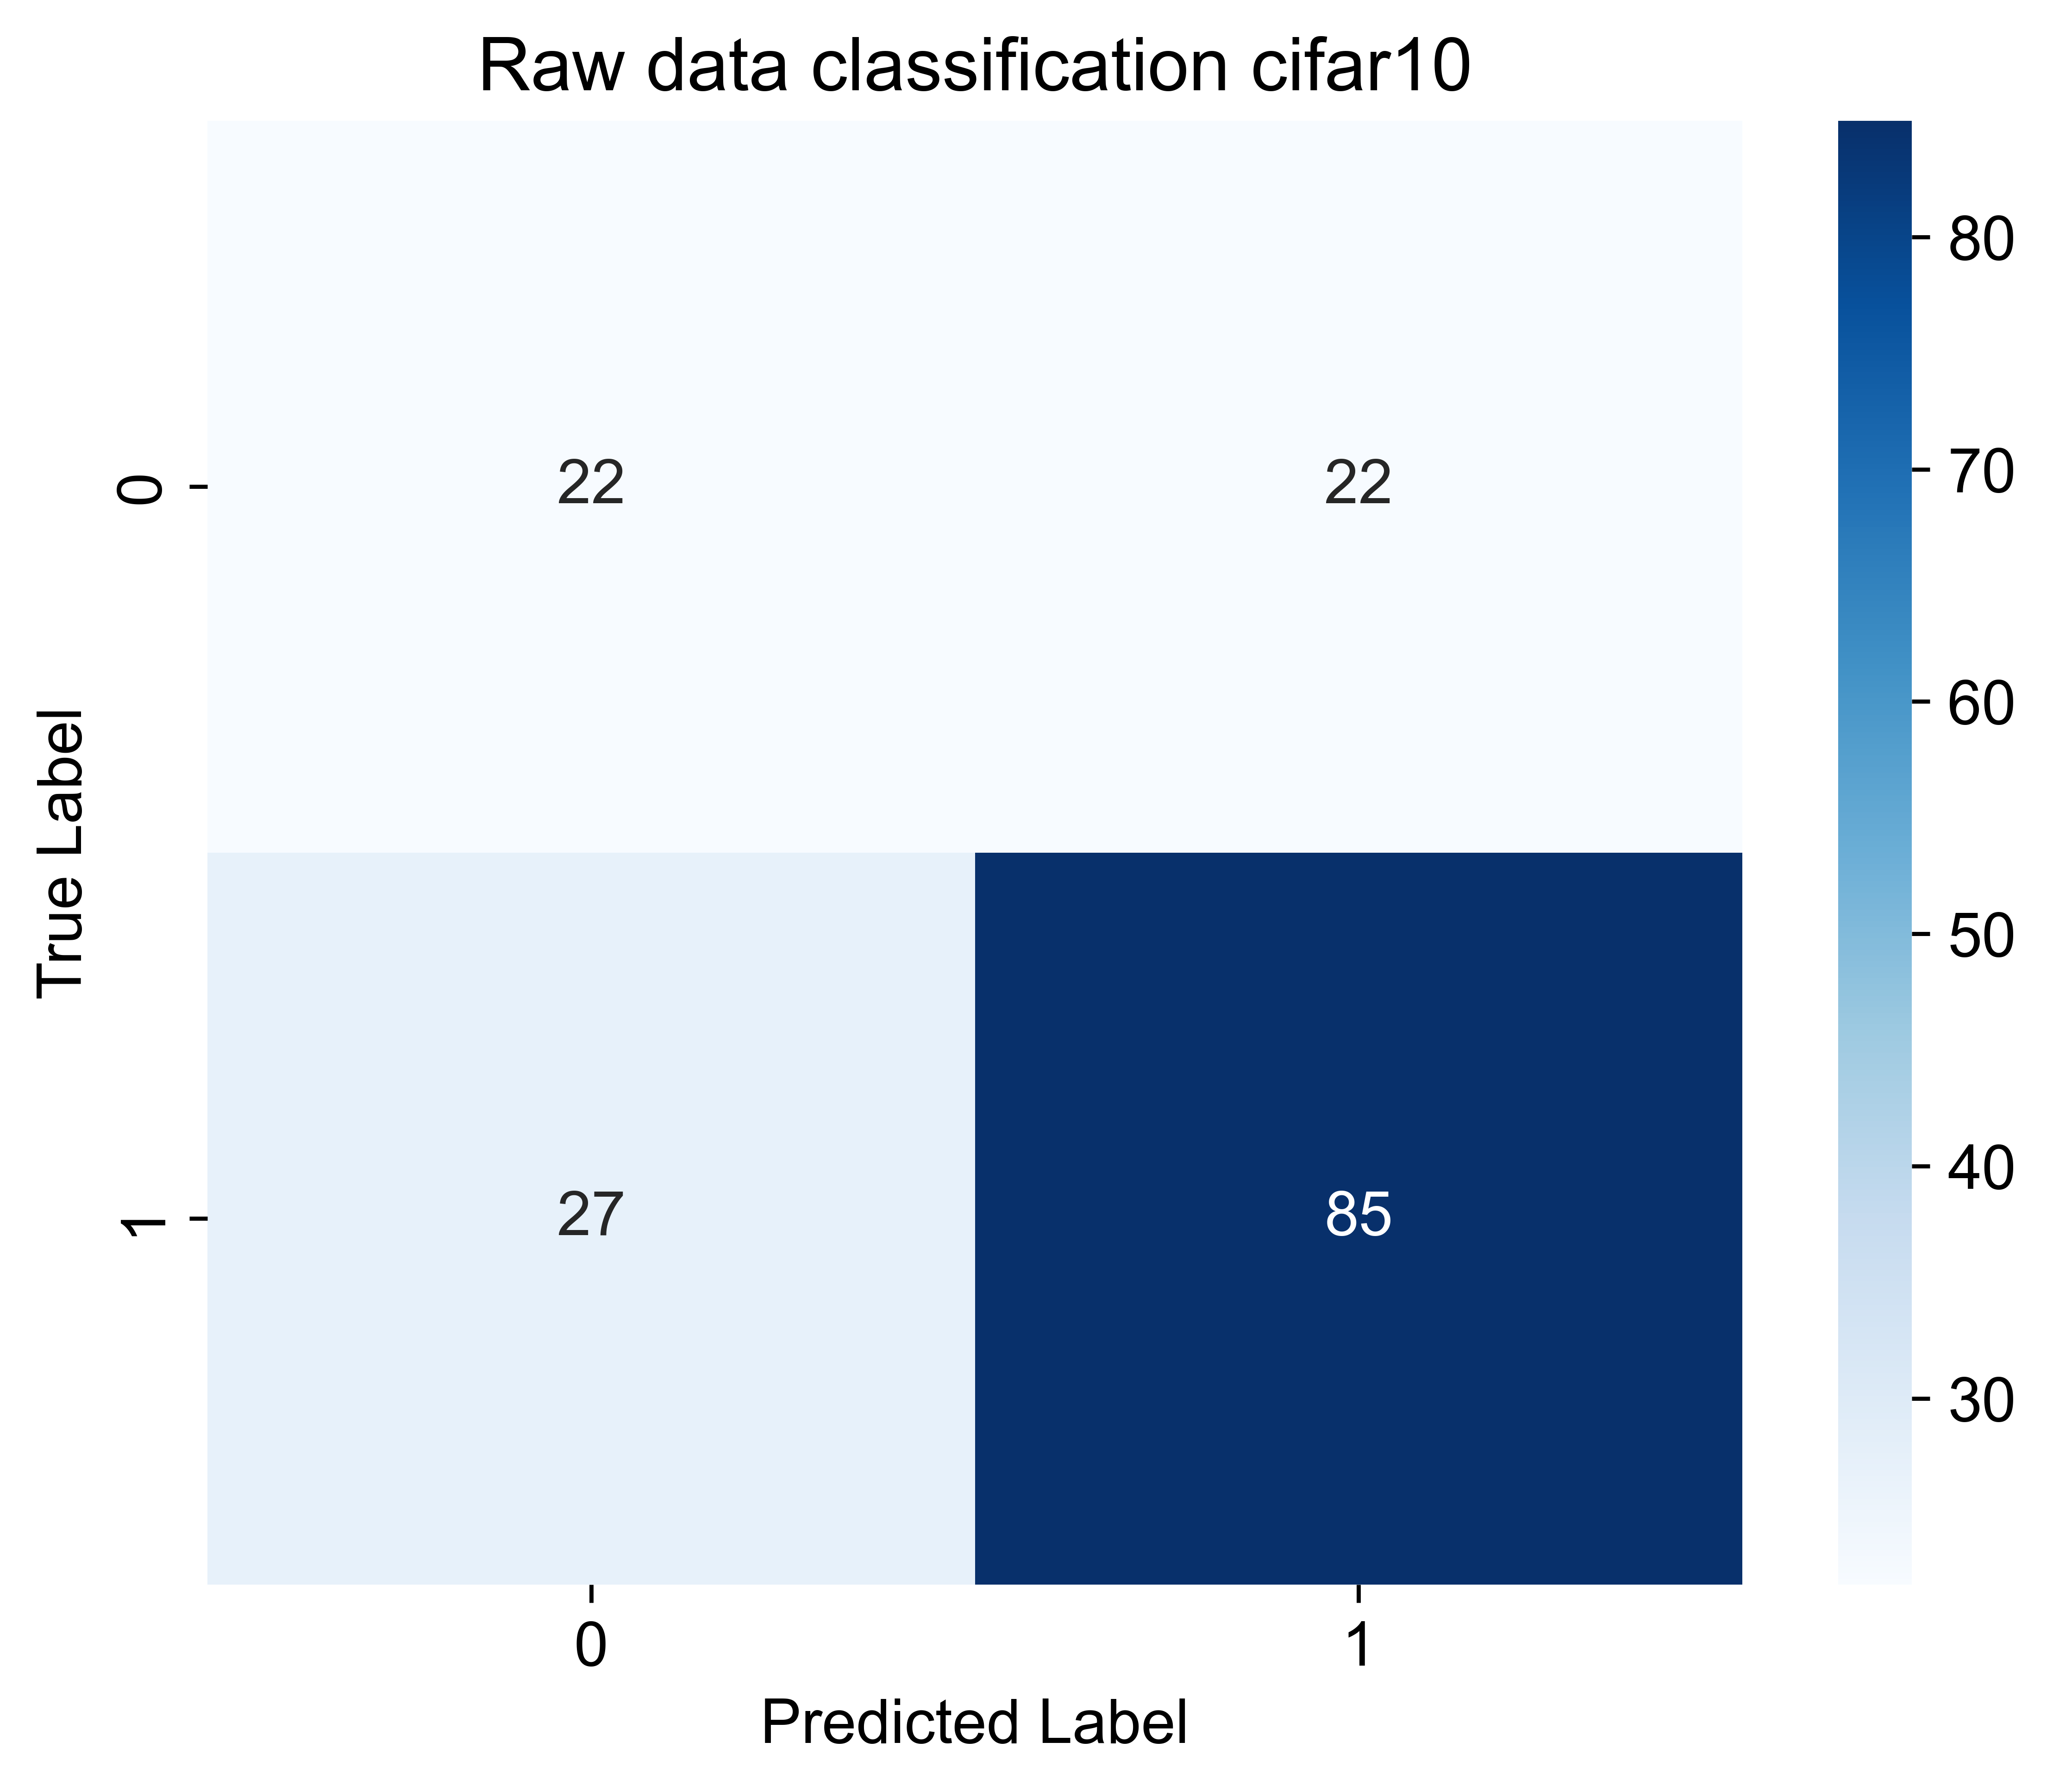

In [612]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5), dpi=800)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Raw data classification cifar10")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



In [613]:

#Eint_path = ("/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/cifar10/unperturbed stable_ppeak3_len_5.55_rawdata.npy")
Eint_path2 = ("/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/breast bpm/stable_ppeak3_len_5.55_rawdata.npy")

Eint_fields = np.load(Eint_path2, allow_pickle=True)
#Eint_fields2 = np.load(Eint_path2, allow_pickle=True)

print("Loaded file.")
print("Array shape:", Eint_fields.shape)

Loaded file.
Array shape: (780, 64, 64)


In [617]:
from skimage.transform import resize_local_mean

data_fiber = np.ones((780,22,22))
for ii in range(780):
        sq = np.abs(Eint_fields[ii])**2
        tot_norm = sq/np.max(sq)
        data_fiber[ii] = resize_local_mean((tot_norm),(22,22))
data_fiber = data_fiber.reshape(780,22*22)
X_train, X_test, y_train, y_test = train_test_split(data_fiber, labels.ravel(), test_size=0.2, random_state=42)

In [620]:
cls = RidgeClassifier()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
trained_acc = cls.score(X_test, y_test)


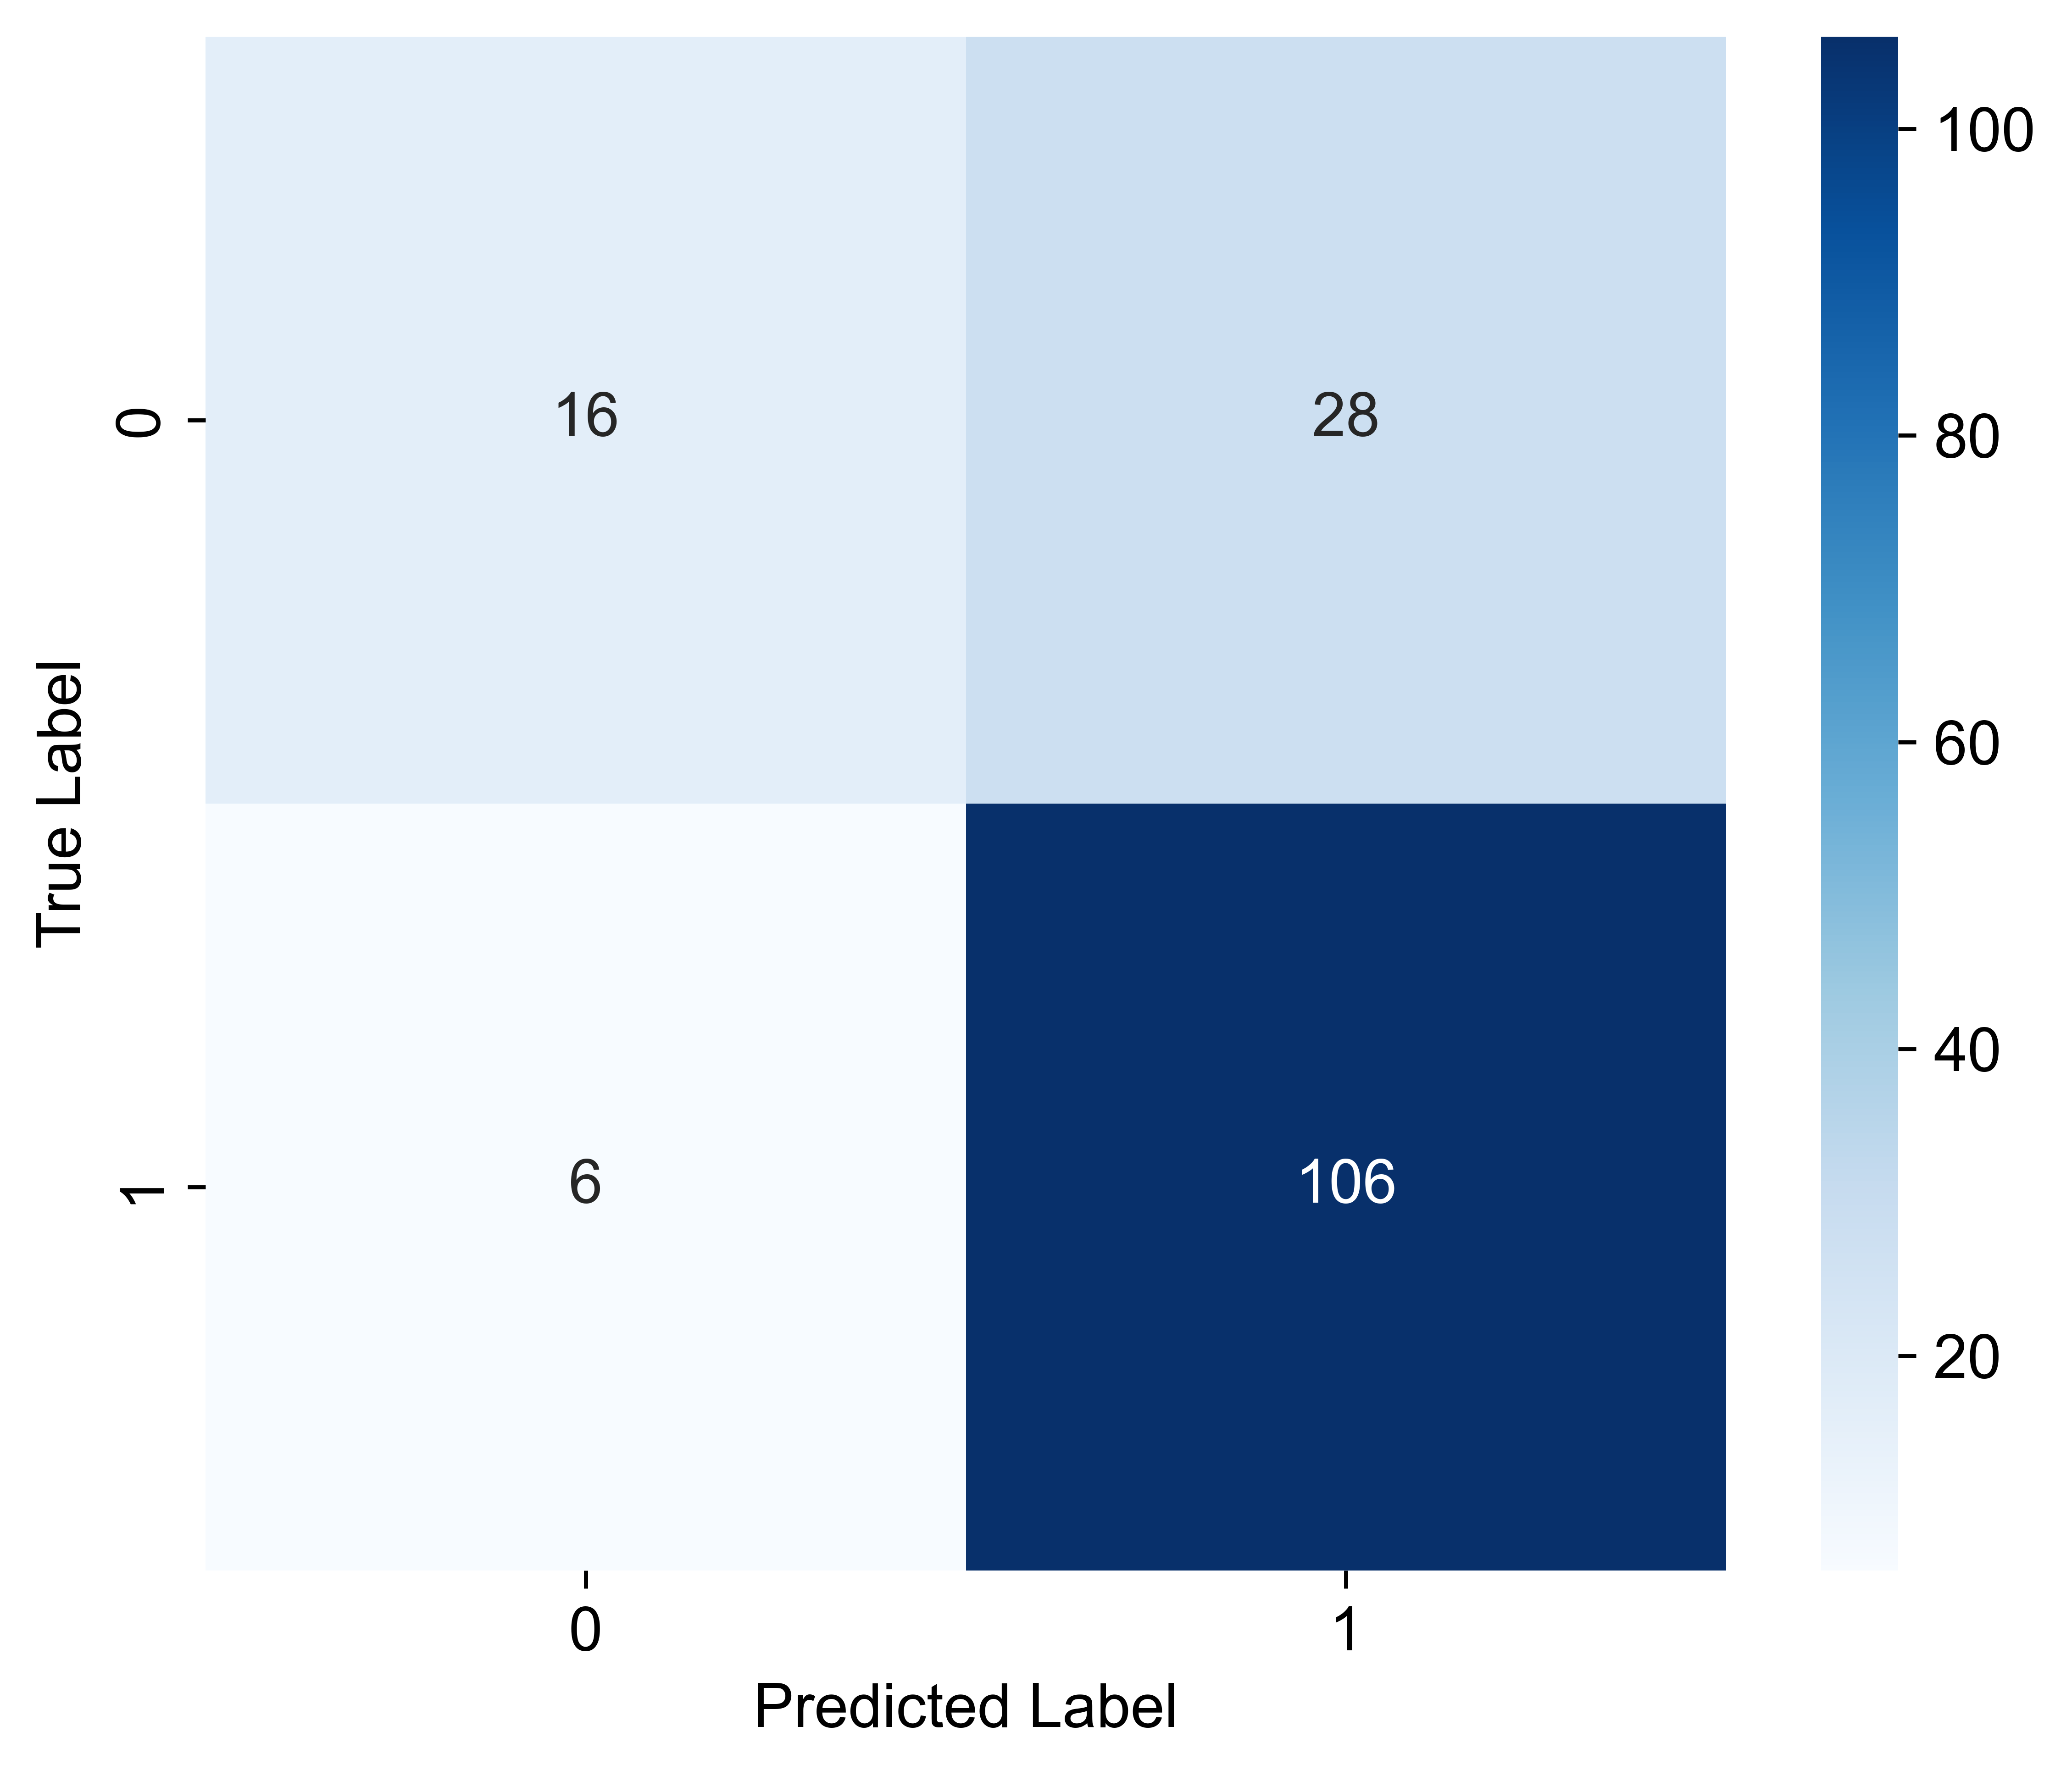

In [621]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5), dpi=800)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()